### Most Common Words

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose() # to make aggregation easier
data.head()

,opentable
able,2
accommodating,1
acknowledgement,1
added,1
additional,1


In [2]:
# Find the top 30 words said by each webpage
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'opentable': [('food', 30),
  ('service', 24),
  ('good', 21),
  ('excellent', 13),
  ('great', 12),
  ('menu', 7),
  ('ordered', 6),
  ('restaurant', 6),
  ('busy', 6),
  ('just', 6),
  ('pasta', 6),
  ('lunch', 5),
  ('piatti', 5),
  ('chicken', 5),
  ('experience', 4),
  ('bread', 4),
  ('make', 4),
  ('recommend', 4),
  ('day', 4),
  ('little', 4),
  ('got', 4),
  ('friendly', 3),
  ('items', 3),
  ('right', 3),
  ('charge', 3),
  ('time', 3),
  ('point', 3),
  ('flies', 3),
  ('favorite', 3),
  ('delicious', 3)]}

In [3]:
# Print the top 15 words said by each webpage
for webpage, top_words in top_dict.items():
    print(webpage)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

opentable
food, service, good, excellent, great, menu, ordered, restaurant, busy, just, pasta, lunch, piatti, chicken
---


### Look at the most common top words --> add them to the stop word list

In [4]:
# from collections import Counter

# # Let's first pull out the top 30 words for each webpage
# words = []
# for webpage in data.columns:
#     top = [word for (word, count) in top_dict[webpage]]
#     for t in top:
#         words.append(t)
        
# words

In [5]:
# # Let's aggregate this list and identify the most common words along with how many routines they occur in
# Counter(words).most_common()

In [6]:
# # If more than half of the comedians have it as a top word, exclude it from the list
# add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
# add_stop_words

In [7]:
# # Let's update our document-term matrix with the new list of stop words
# from sklearn.feature_extraction import text 
# from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# # Add new stop words
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# # Recreate document-term matrix
# cv = CountVectorizer(stop_words=stop_words)
# data_cv = cv.fit_transform(data_clean.transcript)
# data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
# data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [16]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2", width=3000, height=2000, random_state=42)

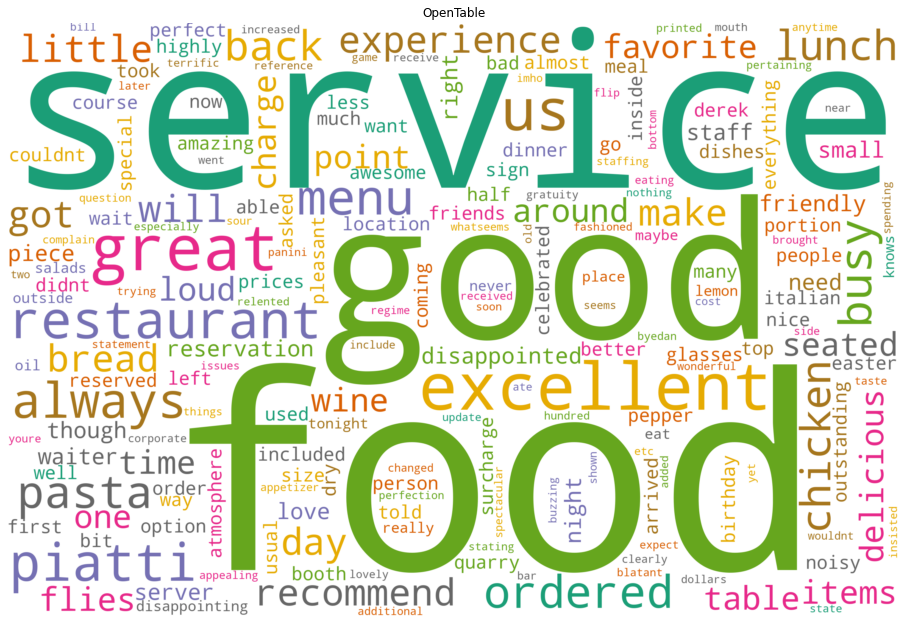

In [17]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]

full_names = ['OpenTable']

# Create subplots for each comedian
for index, webpage in enumerate(data.columns):
    wc.generate(data_clean.transcript[webpage])
    
#     plt.subplot(1, 1, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()